In [1]:
import sys
sys.path.insert(0, '..')
import pyzx as zx
import cotengra as ctg
import quimb as qu
import random

In [2]:
random.seed(1338)
N = 50
# g = zx.qasm("""
# qreg q[2];
# cx q[0], q[1];
# """).to_graph()
g = zx.generate.cliffordT(N, 1500, p_t = 0.0)
g.apply_state(N * '0')
g.apply_effect(N * '0')
zx.to_gh(g)
# zx.full_reduce(g)
g.normalize()

In [63]:
zx.draw(g)

In [3]:
t = zx.quimb.to_quimb_tensor(g)

In [68]:
t

<TensorNetwork(tensors=3634, indices=2183)>

In [61]:
t.contract(output_inds=())

(6.123233995736766e-17+1j)

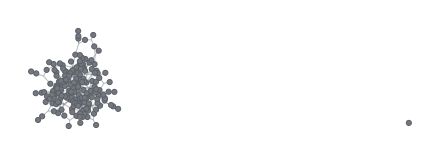

In [7]:
t.draw()

In [4]:
t.compress_simplify_(output_inds=(), progbar=True, equalize_norms=True)

S 683, 367: : 35it [00:11,  3.09it/s]   
L 632, 948: : 6it [00:00,  8.42it/s]    
S 414, 298: : 10it [00:01,  5.41it/s] 
L 630, 945: : 6it [00:00,  8.35it/s]   
S 403, 297: : 10it [00:00, 10.84it/s] 
L 630, 945: : 6it [00:00,  8.55it/s]   
S 402, 297: : 10it [00:00, 53.44it/s] 


<TensorNetwork(tensors=402, indices=297)>

In [69]:
t.full_simplify_('ADCRS', output_inds=(), progbar=True, equalize_norms=True)

S 683, 367: : 35it [00:00, 42.26it/s]   


<TensorNetwork(tensors=683, indices=367)>

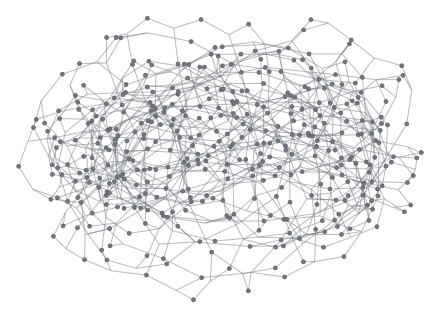

In [5]:
t.draw()

In [6]:
t.contraction_width(output_inds=())

87.0

In [7]:
opt = ctg.HyperOptimizer(progbar=True, max_time=30, reconf_opts={})

In [8]:
tree = t.contraction_tree(output_inds=(), optimize=opt)

log2[SIZE]: 50.00 log10[FLOPs]: 17.27:  13%|█▎        | 17/128 [00:30<03:18,  1.79s/it]


In [14]:
t.contract(optimize=tree.path(), output_inds=())

(-2.1073424255448255e-08-1.490116119384829e-08j)